## Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

## Analisando DataSet

In [4]:
data = pd.read_csv('Student Depression Dataset.csv')
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [5]:
nulos = data[data.isnull().any(axis = 1)]
nulos

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4458,22377,Female,32.0,Varanasi,Student,3.0,0.0,5.64,1.0,0.0,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1
13596,68910,Male,29.0,Hyderabad,Student,2.0,0.0,8.94,3.0,0.0,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0
19266,97610,Female,20.0,Kolkata,Student,1.0,0.0,6.83,1.0,0.0,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0


In [6]:
data = data.dropna()
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [7]:
data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [8]:
data['Degree'].value_counts()

Degree
Class 12    6080
B.Ed        1866
B.Com       1506
B.Arch      1478
BCA         1432
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
BBA          696
MBBS         695
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [9]:
X = data.iloc[:, [1,2,5,7,8,10,11,13,14,15]].values
X

array([['Male', 33.0, 5.0, ..., 'Yes', 3.0, 1.0],
       ['Female', 24.0, 2.0, ..., 'No', 3.0, 2.0],
       ['Male', 31.0, 3.0, ..., 'No', 9.0, 1.0],
       ...,
       ['Male', 31.0, 3.0, ..., 'No', 12.0, 2.0],
       ['Female', 18.0, 5.0, ..., 'Yes', 10.0, 5.0],
       ['Male', 27.0, 4.0, ..., 'Yes', 2.0, 3.0]], dtype=object)

In [10]:
y = data.iloc[:, -1].values
y

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [11]:
data['Depression'].value_counts()

Depression
1    16335
0    11563
Name: count, dtype: int64

## Separação e Transformação

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify = y)

In [14]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9
0,Male,24.0,5.0,6.21,5.0,7-8 hours,Healthy,No,5.0,4.0
1,Male,24.0,4.0,9.93,2.0,More than 8 hours,Unhealthy,Yes,11.0,3.0
2,Male,24.0,1.0,6.37,1.0,5-6 hours,Healthy,No,6.0,2.0
3,Male,34.0,1.0,7.04,5.0,Less than 5 hours,Unhealthy,No,0.0,3.0
4,Female,24.0,1.0,8.9,1.0,7-8 hours,Healthy,No,4.0,1.0


In [15]:
lb = LabelEncoder()
for col in [0, 7]:
    X_train[:, col] = lb.fit_transform(X_train[:, col])
    X_test[:, col] = lb.transform(X_test[:, col])

In [16]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9
0,1,24.0,5.0,6.21,5.0,7-8 hours,Healthy,0,5.0,4.0
1,1,24.0,4.0,9.93,2.0,More than 8 hours,Unhealthy,1,11.0,3.0
2,1,24.0,1.0,6.37,1.0,5-6 hours,Healthy,0,6.0,2.0
3,1,34.0,1.0,7.04,5.0,Less than 5 hours,Unhealthy,0,0.0,3.0
4,0,24.0,1.0,8.9,1.0,7-8 hours,Healthy,0,4.0,1.0


In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train[:, [1,2,3,4,8,9]] = scaler.fit_transform(X_train[:, [1,2,3,4,8,9]])
X_test[:, [1,2,3,4,8,9]] = scaler.transform(X_test[:, [1,2,3,4,8,9]])

In [18]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9
0,1,0.146341,1.0,0.621,1.0,7-8 hours,Healthy,0,0.416667,0.75
1,1,0.146341,0.8,0.993,0.4,More than 8 hours,Unhealthy,1,0.916667,0.5
2,1,0.146341,0.2,0.637,0.2,5-6 hours,Healthy,0,0.5,0.25
3,1,0.390244,0.2,0.704,1.0,Less than 5 hours,Unhealthy,0,0.0,0.5
4,0,0.146341,0.2,0.89,0.2,7-8 hours,Healthy,0,0.333333,0.0


In [19]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5, 6])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [20]:
# st = SMOTE(sampling_strategy='minority', random_state=0)
# X_train, y_train = st.fit_resample(X_train, y_train)

## Rede Neural Para Classificação

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units= 212 ,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid') 
])

In [23]:
model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
X_test = np.array(X_test, dtype=float)
X_train = np.array(X_train, dtype=float)

In [25]:
r = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7598 - loss: 0.4834 - val_accuracy: 0.8437 - val_loss: 0.3594
Epoch 2/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.8458 - loss: 0.3587 - val_accuracy: 0.8462 - val_loss: 0.3551
Epoch 3/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8398 - loss: 0.3615 - val_accuracy: 0.8442 - val_loss: 0.3570
Epoch 4/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.8424 - loss: 0.3584 - val_accuracy: 0.8482 - val_loss: 0.3512
Epoch 5/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8480 - loss: 0.3542 - val_accuracy: 0.8472 - val_loss: 0.3516
Epoch 6/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.8498 - loss: 0.3524 - val_accuracy: 0.8469 - val_loss: 0.3516
Epoch 7/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.8468 - loss: 0.3508 - val_accuracy: 0.8487 - val_loss: 0.3505
Epoch 8/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.8448 - loss: 0.3606 - val_ac

In [26]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


## Resultados

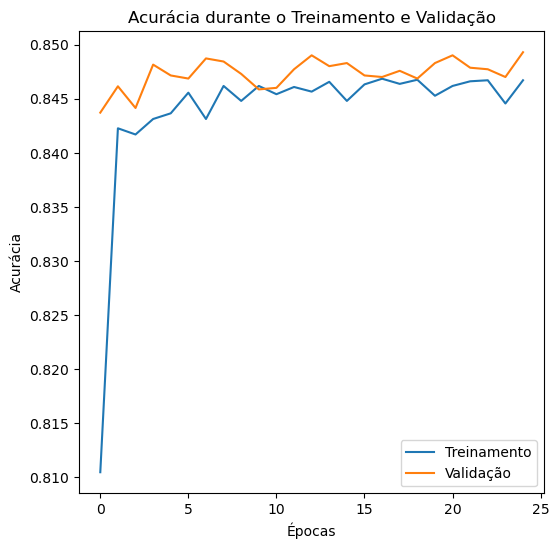

In [28]:
plt.figure(figsize=(6, 6))
plt.plot(r.history['accuracy'], label='Treinamento')
plt.plot(r.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

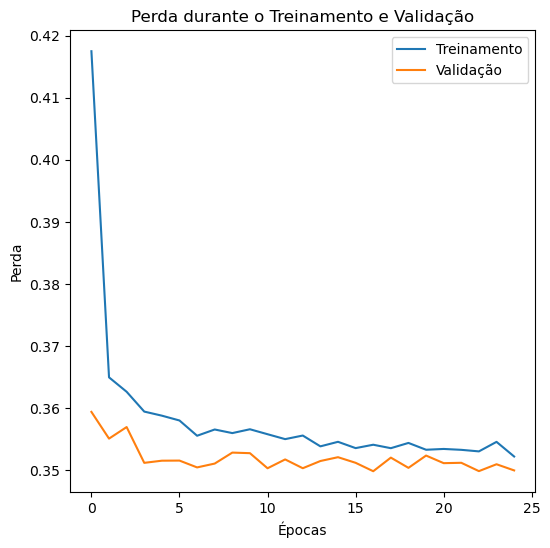

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(r.history['loss'], label='Treinamento')
plt.plot(r.history['val_loss'], label='Validação')
plt.title('Perda durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

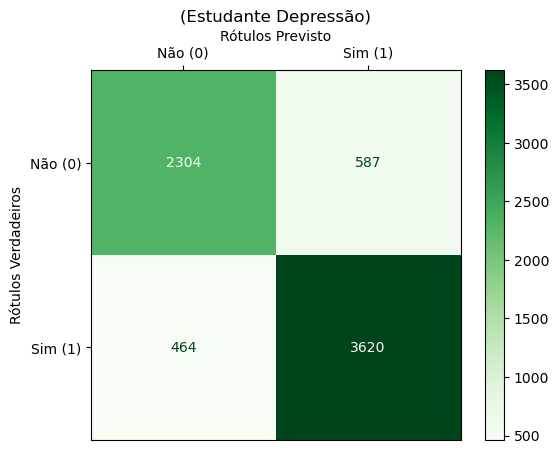

Acurácia: 84.93%


In [30]:
labels = ['Não (0)', 'Sim (1)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

fig, ax = plt.subplots()

disp.plot(cmap=plt.cm.Greens, ax=ax)

ax.xaxis.set_ticks_position('top')  
ax.xaxis.set_label_position('top')  

plt.xticks(rotation=0)  

plt.title("(Estudante Depressão)")  
plt.xlabel("Rótulos Previsto")  
plt.ylabel("Rótulos Verdadeiros")  

plt.show()

print(f"Acurácia: {ac:.2%}")

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2891
           1       0.86      0.89      0.87      4084

    accuracy                           0.85      6975
   macro avg       0.85      0.84      0.84      6975
weighted avg       0.85      0.85      0.85      6975

